# Lesson 6 - Introduction to Machine Learning

In order to use this file, please do the following:
*   Go to the top left corner of Google Colab and click  `File -> Save a copy in Drive`

Here's a rough overview of our plan for the weekly curriculum:

* Week 2: Introduction to Python and OOP
* Week 3: How to Code Like a Pro
* Week 4: Data Preparation and Cleaning
* Week 5: Data Visualization and Exploratory Data Analysis
* Week 6: Miscallenous Topics - Command Line, Pathing, and GitHub
* **Week 7: Introduction to Machine Learning**
* Week 8: Advanced Topics in Machine Learning
* Week 9: How to Succeed Going Forward

#Outline

1. Big Picture Primer
  * **What is a "model"?**
  * Machine Learning tasks
    * Supervised
    * Unsupervised
  * Train-test split
  * Bias Variance Tradeoff
  * Classical ML vs. Deep Learning

2. Linear Models Explained
  * What is a (generalized) linear model?
  * Linear regression
    * Lasso and Ridge Regression
  * Logistic regression
  * Support vector machines (SVMs)



---
# 1. Big Picture Primer
* Due to exorbiant prices in the quote forgery black-market, we will be ommiting quotes from today's lesson.

Welcome to the coolest part of curriculum. Today's lesson is very dense in information, so feel free to look back at this notebook after the live lesson if you need to reinforce your understanding. 

This first section is designed to introduce you to the big-picture ideas, intuition, and terminology of **machine learning** (ML). If this is your first introduction to topics in machine learning, we hope this will serve as a solid foundation in some of the main ideas.


## What are models?
Data Scientists and Machine Learning Engineers love using the word "model." But what are they actually talking about?

**In full generality, a model is an algorithm that uses data to make some kind of prediction.**

## What does this look like concretely?

In [ ]:
import os
import pandas as pd 
housing_df = pd.read_csv('sample_data/california_housing_train.csv')

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


The above dataset tracks the median house price across various counties in California. One useful model could try to predict the `median_house_value` column given all the other information about a given county (i.e. latitude, longitude, median income, etc). Zillow's Zestimate, for example, is a version of this applied to individual houses as opposed to entire counties.

After building a model to do this, someone with access to the model could input information about a house and get a *prediction* or *estimate* of the houses' value, which can be super useful.

In general, we use predictive models to help aid us in important or useful tasks. 

In [ ]:
from PIL import Image
import numpy as np
mnist_df = pd.read_csv('sample_data/mnist_train_small.csv')
display(mnist_df.head())

pixels = mnist_df.iloc[:, 1:]
labels = mnist_df.iloc[:, 0]

images = []
for row in range(len(pixels)):

  image_pixels = np.asarray(pixels.iloc[row,:]).reshape(28,28) # MNIST images are 28px by 28px, but are stored in this df as a flat array with (28*28) entries
  images.append(Image.fromarray(np.uint8(image_pixels)))

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(5):
  display(images[i])

In [ ]:
labels[0:5]

0    5
1    7
2    9
3    5
4    2
Name: 6, dtype: int64

A model can also be more complex -- in the above case, we could train a machine learning model to read the pixels of an image of a handwritten digit and classify which digit it is. The state of the art modeling techniques used for this digit-recognition problem are what drive the FaceID on iPhones and other computer-vision related tasks. 

## Machine Learning Tasks

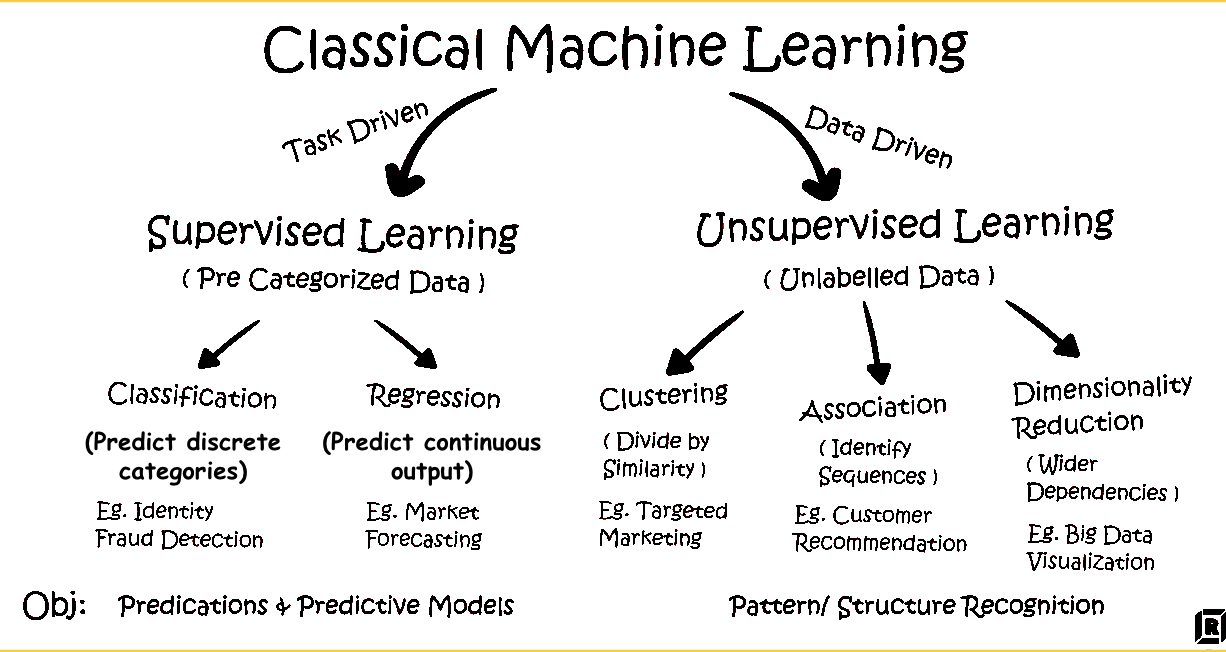

## Most ML tasks are split into two categories: **supervised learning** and **unsupervised learning**.

**Supervised learning** is when we teach a computer to predict some output by giving it *labeled* examples. An example of this is predicting house price: in order to train our algorithm to predict the price of a house, we first feed it tons of examples of houses (i.e. their information or "features") and the corresponding house price.

Supervised learning is usually split into two subtasks: *classification* and *regression*. Classification is predicting some *discrete* output or variable given some data. For example, predicting whether or not an image is a dog or a cat photo is an example of a *classification* task, since each data point will be classified into 1 of 2 categories.

Alternatively, *regression* is predicting some continuous value from input data. The house price prediction example is a *regression* problem, since we're predicting price, which is a continous variable.



**Unsupervised learning** is when we ask a computer to do some sort of task for us on a dataset *without* labeled examples. This can include *clustering*, which is essentially figuring out which elements of a dataset are similar to each other (and forming "clusters" of data points based on their proximity to each other), or dimensionality reduction, which helps us reduce the information needed to represent each data point in our dataset.

## Question: Was the hand-labeled digit example from above a supervised or unsupervised machine learning problem?

## Training and Testing Models

### What does "training" a model mean?

Every model that works needs to *learn* from data it sees. Usually, models have variables called *parameters* or *weights* which influence their output in some meaningful way, and the process of *training* a model is essentially changing these parameters so that the model's prediction on samples from the dataset matches their associated labels.

In [ ]:
from sklearn.linear_model import LinearRegression

housing_labels = housing_df['median_house_value']
housing_features = housing_df.drop(['median_house_value'], axis=1)

clf = LinearRegression()
clf.fit(housing_features, housing_labels)

print(clf.coef_)

[-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]


In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Above is code to train a linear regression model on our median house price example from earlier (we will cover these in depth in the next section). I've gone ahead and printed the *coefficients* of this linear model, or the *weights* it has learned by *fitting* to our dataset. When we trained this model, all we did was have our model learn the optimal value for these coefficients so that its predictions matched what it saw in the dataset.

## How do we evaluate models? 

A model is useless if we don't know how good it is. When evaluating models, it's important to test them on data they've never seen before in their training. Because of this, we generally set aside some small fraction of our dataset as a *testing set*.

After splitting our data, we use some metric which tells us how good each prediction of our model was on each sample in the test set. For classification tasks, this can be accuracy. In the case of our housing price regression, we employ MAE, or mean absolute error. This tells us, for each prediction, the difference between predicted price and actual price. The formula for MAE is

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$ 

Where $y_i$ is the label and $\hat{y}_i$ and is the prediction for a given house at index i.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_labels, test_size=0.2)

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

array([208575.23993613, 174338.14523635, 277268.99254929, ...,
       224907.49556211, 129715.63726858, 187072.18191669])

In [ ]:
mean_absolute_error(preds, y_test)

51537.198136252395

The above code is a super quick and dirty training and evaluation of our linear regression model. The output of the last code block tells us that, on average, our model was off by around $50,000 dollars 😳.

Clearly, we can improve on this model. (foreshadowing)

## Fitting and the Bias Variance Tradeoff

Not all models are created equally. Some work better than others for certain tasks. But one common interest of data scientists is understanding how well their models "generalize" to data they haven't seen before. Sure, we can train models to perform well on predicting stuff in our training data, but does good performance on the training set mean good performance on the testing set?

### Sometimes, models tend to learn training data "too well" at the expense of generality.

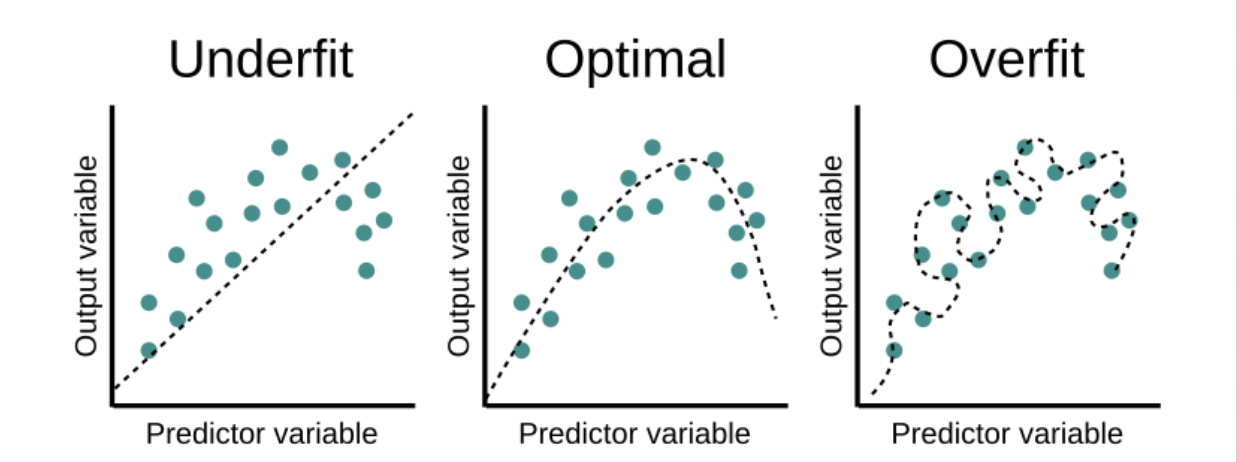

If our model fits *too well* to our data, we call that *overfitting*. There is also *underfitting*, where our model doesn't learn the data well enough to make good predictions. In general, we want our models to mostly fit to the training data, but not so much so that they are unable to generalize to new out-of-dataset examples

### Bias

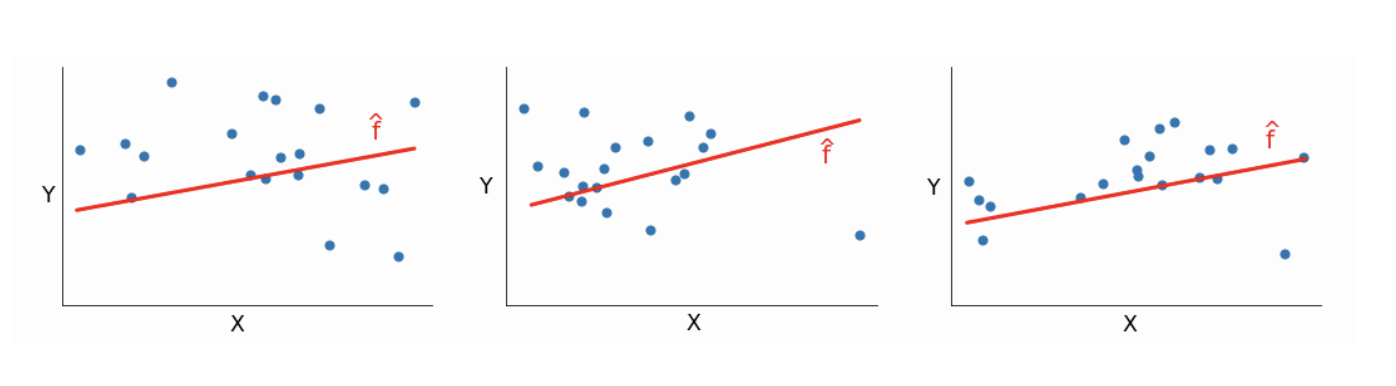

The above graphs are the predictions of a model trained on 3 separate datasets. As you can see, even though the shape of the data (the geometry/structure of the blue dots) changes between each graph, the model's predictions look the same each time.

This is what we'd describe as having "high bias". Bias refers to the previous assumptions about the data we're predicting on. In this case, our model is clearly predicting a straight line each time, when perhaps the data has a more curvy structure. The bias in this case is the assumption that our data follows a "linear" pattern, when it clearly does not in reality.

### Variance

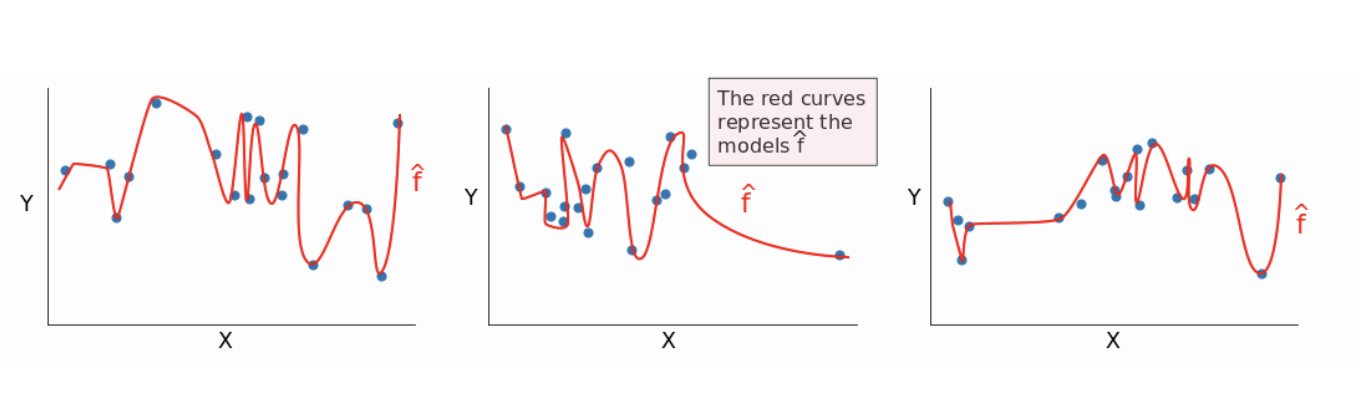

In contrast with the above graphics, these graphs vary disproportionately between datasets. Even though the data it's trained on changes between graphs, the overall impact on the model's output is super high. Because the model's predictions vary so much due to small changes in the data it's trained on, we say that this model has *high variance*.

## Question: How would you describe the bias and variance of a linear regression model?

### The tradeoff

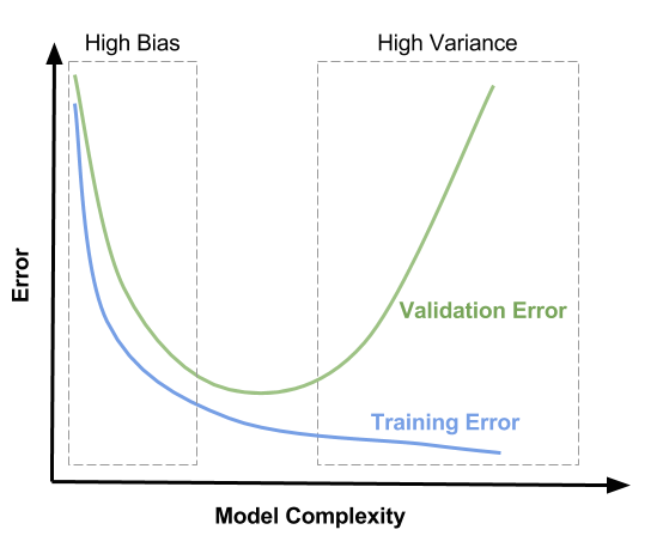

The above graph helps illustrate the bias-variance tradeoff we make when selecting a given machine learning model. Generally, models with high amounts of bias have low variance, and models with high variance have low bias. The ideal situation is when both bias and variance are minimized -- i.e. we don't rely on too many assumptions about our data, and our model doesn't overfit to any arbitrary dataset. 

## Classical ML vs. Deep Learning

Machine Learning is going through a revolution right now due to a family of models called *neural networks*. We won't have much time to cover them as they are pretty nuanced and complicated, however we felt it was worth acknowledging the distinction between *deep learning* (i.e. machine learning with neural nets) and *classical machine learning* (older, tried and tested modeling methods like linear regression or random forest).

If anybody wants to talk deep learning or more advanced ML topics, feel free to message either of us (Daniel and Nick) on Slack, we'd love to chat about these and provide resources for you to learn more on your own.

---
# 2. Linear Models

We're now going to tackle **linear models**. In the simplest sense, a linear model  is a model that assumes that the relationship between input variables ($x_1, \ldots, x_n$) and the response variable ($y$) is linear. 

---
# Linear Regression

As you might expect, linear regression is a linear model. Let's consider the simplest case of linear regression, which is where we have a single input variable $x$ and a response variable $y$. Assuming that the hypotheses of linear regression are met (which you'll learn about if you take Stats 101A or Stats 100C), we fit a linear function to the data which minimizes the sum of the squared residuals (i.e., the square of the difference between the predictor $\hat{y}_i$ and $y_i$ at each $x_i$). This is called the *ordinary least squares* (OLS) approach, and this minimization is what determines the slope and intercept coefficients of the model.

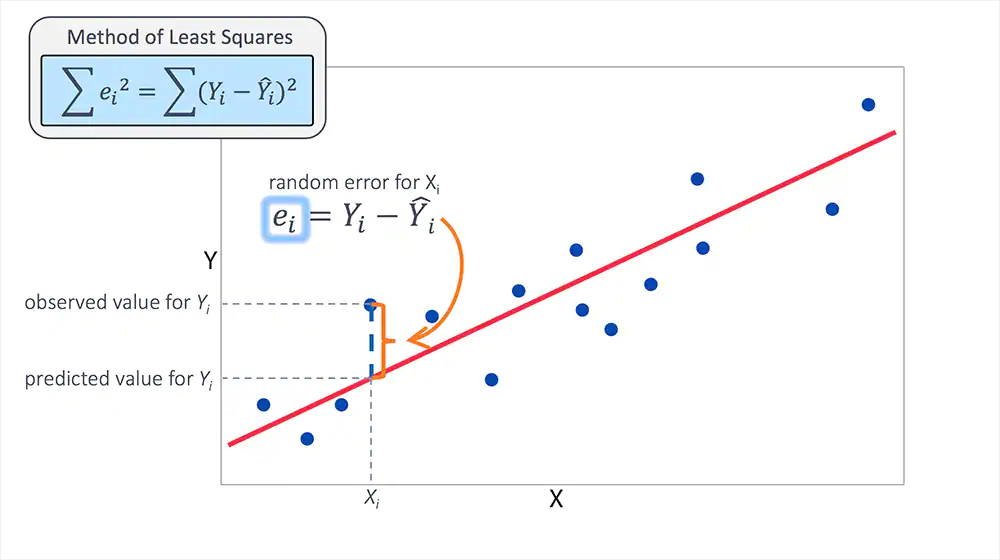

Let's look at linear regression from a more mathematical perspective. Suppose that we have $n$ datapoints $(x_1, y_1), \ldots, (x_n, y_n)$. In the case with a single predictor $x$ and a response variable $y$, the underlying relationship between $x$ and $y$ at each point $i$ is given by

$y_i = \beta_0 + \beta_1x_i + \epsilon_i$

where $\beta_0$ and $\beta_1$ are unknown parameters and $\epsilon_i's \sim \mathcal{N}(0, \sigma^2)$ give the error. Our goal is to fit a candidate function

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$

where the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are the *best estimates* of the true parameters $\beta_0$ and $\beta_1$ under the OLS criteria. Recall that we want to minimize the sum of the square residuals, so the quantity that is minimized in OLS regression is $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \hat{\epsilon}_i^2$.

---
## Linear Regression in Python

Now that you're familiar with the intuition behind linear regression, let's look at how we'd go about implementing it with `scikit-learn`. `scikit-learn` (or sklearn) is a popular library for machine learning and a great library to learn about ML with. Let's see how we'd use sklearn to fit a linear regression line, visualize it, and extract the coefficient estimates. We'll be working with a dataset containing information about various characteristics of red wine samples.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('https://raw.githubusercontent.com/nmonozon/dsu-spr-22/main/red_wine.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We'll be using `fixed acidity` as our predictor variable and `pH` as the response variable. Let's build the model!

Slope: -0.05980272
Intercept: 3.81065889
R2 value: 0.44898
MAE: 0.08931


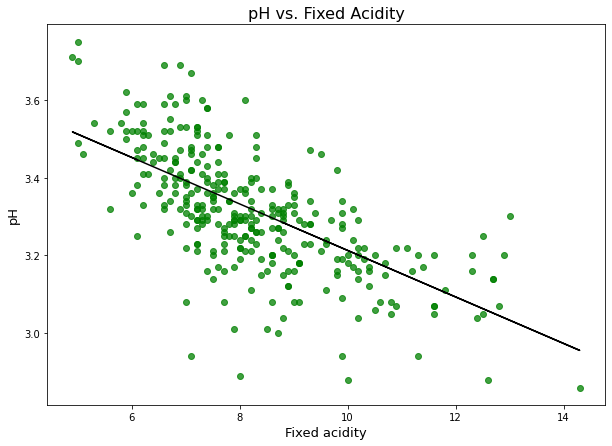

In [ ]:
wine_x = df['fixed acidity']
wine_y = df['pH']

X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, random_state = 1120)
X_train, X_test, y_train, y_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1), y_train.values.reshape(-1,1), y_test.values.reshape(-1,1)

clf = LinearRegression()
clf.fit(X_train, y_train)

test_predictions = clf.predict(X_test)

print(f'Slope: {round(float(clf.coef_), 8)}')
print(f'Intercept: {round(float(clf.intercept_), 8)}')
print(f'R2 value: {round(r2_score(y_test, test_predictions), 5)}')
print(f'MAE: {round(mean_absolute_error(y_test, test_predictions), 5)}')

plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test, alpha=0.75, color="green")
plt.plot(X_test, test_predictions, color="black")
plt.xlabel('Fixed acidity', fontsize=13)
plt.ylabel('pH', fontsize=13)
plt.title('pH vs. Fixed Acidity', fontsize = 16)

plt.show()

As we can see, the fitted linear model on the testing set has an $R^2$ value of -0.59348 and an MAE value of 0.08595. We also extracted the OLS estimates for the coefficients using attributes of the `LinearRegression` object.

## Question: How can we interpret the $R^2$ and MAE values?

---
## Variants of Linear Regression

We can sometimes get better results by adding a **regularization** or **penalty** term.

### Ridge Regression

In **ridge regression** (or **L2 regularization**), rather than minimizing $\sum_{i=1}^{n} (y_i-\hat{y_i})^2$, we minimize $$\sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{i=1}^{n}\beta_{i}^{2}$$ where
*   $\lambda$ is a penalty parameter we choose. The higher the value we choose, the smaller our coefficients end up being.
*   $\beta_i$ are the coefficients selected by the model.

Ridge regression favors smaller coefficients and reduces the overall variance of the model.

### LASSO Regression

In **LASSO regression** (or **L1 regularization**), we minimize $$\sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{i=1}^{n} \lvert \beta_{i} \rvert$$

Lasso regression favors smaller coefficients and sometimes even makes them equal 0 (it eliminates variables), which is good if you want a simpler model but bad in that it increases the bias of your model.

--- 
## Generalized Linear Models

In the previous section, we defined a linear model as a model that assumes that the relationship between input variables ($x_1, \ldots, x_n$) and the response variable ($y$) is linear. However, this isn't the whole story. Linear regression models are only good when the distribution of the underlying data follows a linear trend. This is where **generalized linear models** come in. Generalized linear models (which, along with linear regression, are often collectively referred to as linear models) are generalizations of linear regression that allow us to relation a linear regression model to another probability density function through something called a *link function*. We won't go into too much detail on this, but just know that generalized linear models (e.g., linear regression, logistic regression, and Poisson regression) are all related by a common linear model.

---
## Logistic Regression

**Logistic regression** is a type of generalized linear model. Despite the name, logistic regression can be thought of as a *classified task* rather than the regression task. In logistic regression, we are normally trying to predict a binary outcome (e.g., if it's day or night, if someone has a college degree) based on some predictor variables.

A random variable $X$ is said to be *Bernoulli* with parameter $p$ if

$$X = 
\begin{cases}
0 \text{  with probability $1-p$}, \\
1 \text{  with probability $p$}.
\end{cases}
$$

If this isn't familiar to you, that's okay! Essentially, a Bernoulli random variable is used to model the probability of success (which is denoted with a 1) and the probability of fail (which is denoted with a 0) for some event. For instance, let $X$ be a random variable that gives the probability of flipping heads on a (fair) coin. In this case, $X$ is Bernoulli with parameter $p = 0.5$ because we have a 50/50 chance of getting heads or tails.

Logistic regression assumes that response values are conditionally Bernoulli distributed, where the predicted response will range between 0 and 1, (0 denotes that the event didn't occur and 1 denotes that it did occur). Since the predicted response value ranges from 0 to 1, we can naturally interpret the response $y_i$ at a point $x_i$ as the *probability that an event occurs*.

Let's look at the following graph as an illustrative example of why logistic regression is useful.

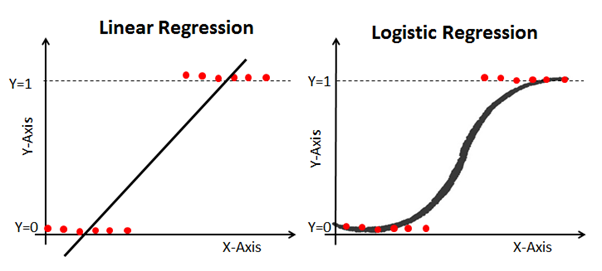

Imagine that we work in the UCLA Admissions Office and want to predict if a student will be admitted based on their high school GPA. Let the predictor variable $x$ be high school GPA and the response variable $y$ be if a student was admitted to UCLA or not. It doesn't make sense to model $y$ continuously, as a student was either accepted to UCLA or not accepted to UCLA (if we don't consider waitlist). So, if we represent $y$ with 0s and 1s and try to fit a linear regression line, we can see that the linear regression line fails to pass through most of the observations, as we're trying to predict a *discrete output* using a *continuous model*. This is where logistic regression comes in.

Logistic regression fits a **sigmoid** function to the data, which a function $f: \mathbb{R} \to [0,1]$ (i.e., it takes any $x_i$ (which comes from a continuous scale) and maps it to a value between 0 and 1 corresponding to the probability that the event occurs given the observed $x_i$). An example sigmoid function is below.

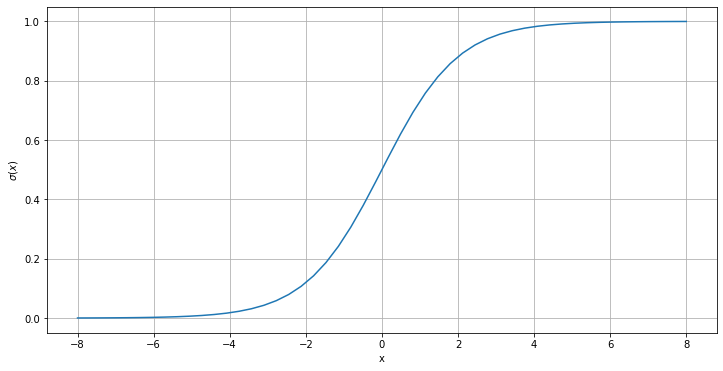

In [ ]:
x = np.linspace(-8, 8)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.show()

So far, we've talked about logistic regression in terms of predicting if an observation falls into one of two categories. However, for more complex problems, we may also wish to consider if an observation falls into one of more than two categories (e.g., if someone is liberal, conservative, or centrist on the political spectrum). In this case, we'd call this *multinomial logistic regression*, but for now, we'll continue looking at logistic regression with just two categories. To be precise, we could call this *binomial logistic regression*.

To classify an observation $X = (x_1, \dots, x_n)$, we plug in a linear combination of the predictors into the sigmoid function: $y(x) = \sigma(b_0 + b_1 x_1 + \dots + b_n x_n)$, and take the class for which the predicted probability is greatest.

Note: Mathematically, the algorithm works by minimizing the <i>cross-entropy</i> or <i>log loss</i>. In the binary case, this is: 
<br>
$-\sum\limits_{i=1}^{N} \{t_n \ln y(x_n) + (1-t_n) \ln (1-y(x_n))\}$
<br>
since the predicted probabilities between the two classes sum to 1. The model uses <i>gradient descent</i> to solve for the optimal solution for the coefficients.


---
## Logistic Regression in Python

Let's look at how we can implement logistic regression using `scikit-learn`. We're going to use the breast cancer dataset from sklearn to predict if a patient has breast cancer.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# Prepare train-test-split
bcancer = load_breast_cancer()
X = bcancer.data
y = bcancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Creating and fitting the model
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

pd.DataFrame(X).head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's look at the coefficients of each predictor variable as well as the intercept that our model estimated. Because we are using 30 predictors, there are 30 coefficients.

In [ ]:
# The model's coefficients (b0, b1, ..., bn)
print(f'Intercept: {lr.intercept_[0]}')
print(f'Number of Variables = {X.shape[1]}, Number of Coefficients = {len(lr.coef_[0])}')
print(lr.coef_[0])

Intercept: 26.533227039868702
Number of Variables = 30, Number of Coefficients = 30
[ 1.1004349   0.14119326 -0.32244873  0.03073849 -0.14902816 -0.23903826
 -0.48919465 -0.26833443 -0.28518583 -0.03180185 -0.06394032  0.55161054
  0.18714531 -0.06343665 -0.0180669   0.03211404 -0.05566635 -0.03525027
 -0.06357592  0.00846066  0.27862147 -0.37648718 -0.07774959 -0.02309594
 -0.27411609 -0.57862118 -1.15999011 -0.52937853 -0.69177141 -0.07082233]


Let's see how we did! This is called a *confusion matrix*; you should always plot one when doing a classification task.

Accuracy: 95.32%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


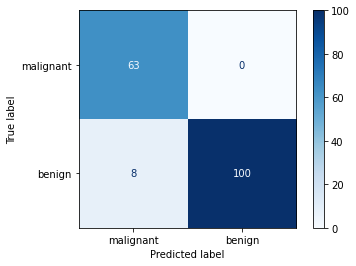

In [ ]:
from sklearn.metrics import plot_confusion_matrix

print(f'Accuracy: {lr.score(X_test, y_test)*100:.2f}%')
plot_confusion_matrix(lr, X_test, y_test, display_labels=bcancer.target_names, cmap="Blues")
plt.show()

Note that while we're using 30 predictors here, we could probably reduce the number of predictors needed using something called *principal component analysis*. 

---
## Support vector machines (SVMs)

Now that we've talked about linear regression and logistic regression, we're going to end by introducing a final, but extremely powerful, algorithm called **support vector machines** (or SVMs). SVMs are used for both regression and classification, but we'll be focusing more on their uses in classification.

The goal of SVMs is to find a *hyperplane* in $n$-dimensional space, where $n$ is the number of columns/features, that maximizes the margin between each class of datapoints. By maximizing the margin, this lets the model classify future, unseen observations with more accuracy. If a future datapoint falls on one side of the hyperplane, we predict it to be a member of the respective class on that side of the hyperplane. To make this less abstract, consider the graphics below.

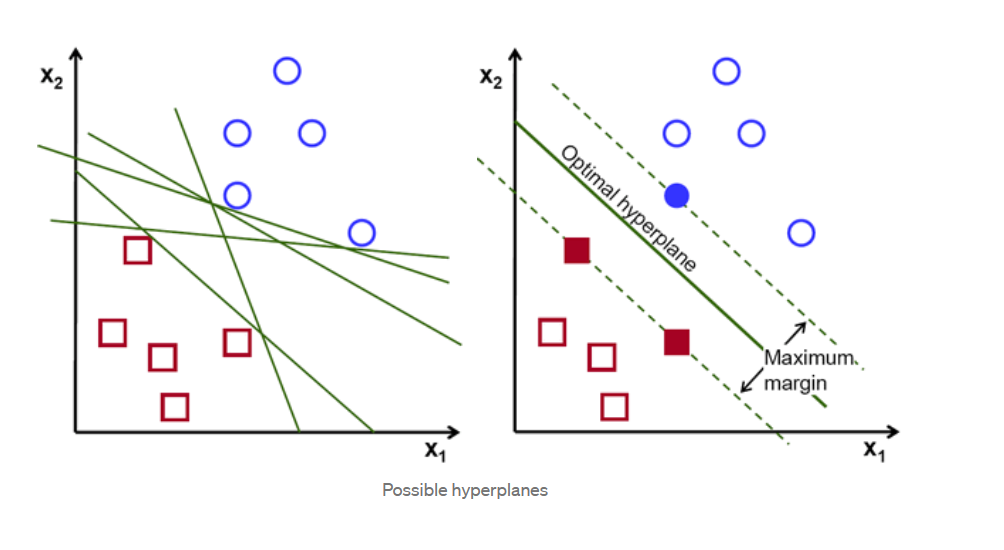

It's important to note that there are many hyperplanes that can be chosen, but we've interested in the one with the largest margins. We can't really visualize hyperplanes in $n$-dimensional space when $n > 3$, so hopefully the following graphics provide intuition. Note that when we have a single predictor, the hyperplane is a line in $\mathbb{R}^2$, when we have two predictors, the hyperplane is a plane in $\mathbb{R}^3$, and so on.

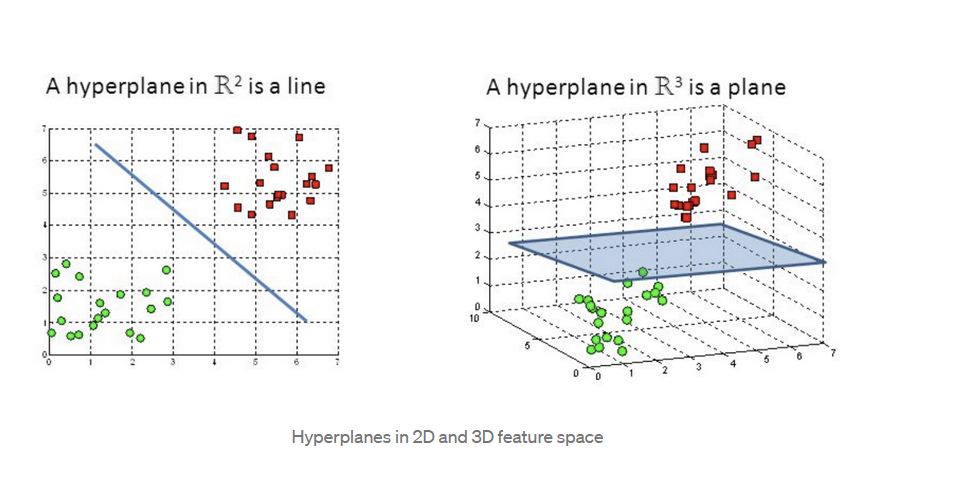

Now that we've introduced the concept of hyperplanes, let's talk about *support vectors*. Support vectors are datapoints that lie close to the hyperplane and thus influence its position and orientation. As such, the farther away points in each class are, the wider the margins of the hyperplane will be and thus the more accurate our predictions will be.

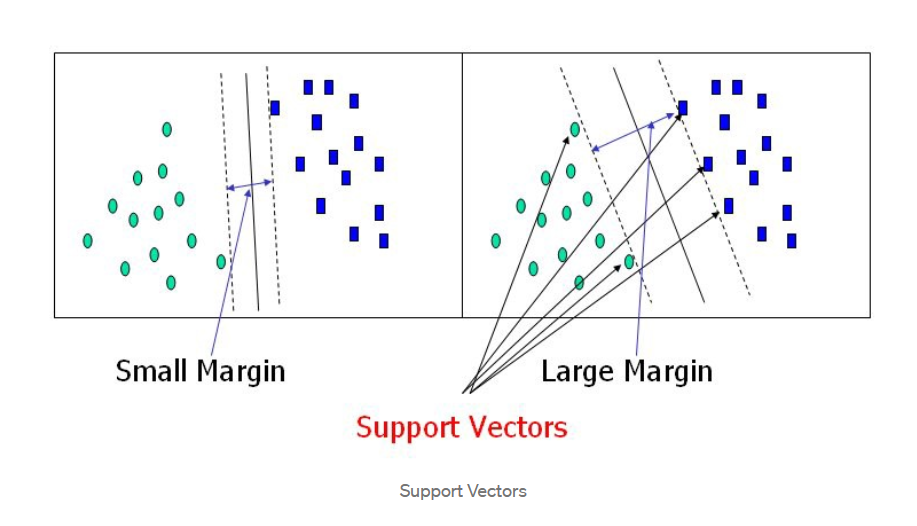

---
## SVMs in Python

Let's look at how we'd implement an SVM classifier using `scikit-learn`. For this, we'll use the popular iris dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris).

In [ ]:
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=colnames)

iris_df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are 3 types of iris in this dataset: setosa, versicolor, and virginica. Let's encode them as 1, 2, and 3 respectively.

In [ ]:
iris_df = iris_df.replace({'class':{"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}})
iris_df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Finally, let's fit our model.

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Train-test split
X = iris_df.drop(columns=['class'])
y = iris_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1120)

# Fitting model
svm = SVC(kernel = 'linear', random_state = 1120)
svm.fit(X_train, y_train)

# Predictions
preds = svm.predict(X_test)

Let's plot the confusion matrix to see how our SVM did!

Accuracy: 93.33%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


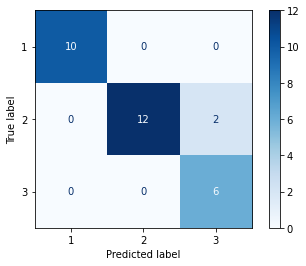

In [ ]:
print(f'Accuracy: {svm.score(X_test, y_test)*100:.2f}%')
plot_confusion_matrix(svm, X_test, y_test, cmap="Blues")
plt.show()

As we can see, the SVM model accurately classified 28/30 observations in the testing dataset.

---
# Anonymous Feedback

If you have any feedback for us, please let us know! The feedback form is completely anonymous, and we promise we'll take your suggestions into consideration for future meetings: https://forms.gle/eve5noVB9ccXbomM7

#Credits

Primary Contributors:
* Daniel Mendelevitch
* Nick Monozon



Secondary Contributors:
*   Sean Tjoa
*   Tristan Dewing
*   Andy Chen
*   Emily Gong
*   Tara Jaigopal

